In [1]:
import secrets
import pandas as pd
import plotly.express as px

In [2]:
d6 = (1,2,3,4,5,6)

def roll_summed(count=2, die=d6, pips=0):
    return sum(secrets.choice(die) for n in range(count)) + pips

def roll_successes(count=2, die=d6, target=4):
    return len(list(filter(lambda x: x >= target, (secrets.choice(die) for n in range(count)))))

In [3]:
results = []
for i in range(1, 8):
    for k in range(10_000):
        for j in range(3):
            results.append({
                'code': f'{i}d6+{j}' if j > 0 else f'{i}d6',
                'dice': i,
                'pips': j,
                'value': roll_summed(i, pips=j)
            })
df = pd.DataFrame(results).sort_values(by=['dice','pips']).reset_index()
df

,index,code,dice,pips,value
0,0,1d6,1,0,5
1,3,1d6,1,0,5
2,6,1d6,1,0,4
3,9,1d6,1,0,1
4,12,1d6,1,0,2
...,...,...,...,...,...
209995,209987,7d6+2,7,2,31
209996,209990,7d6+2,7,2,30
209997,209993,7d6+2,7,2,24
209998,209996,7d6+2,7,2,27


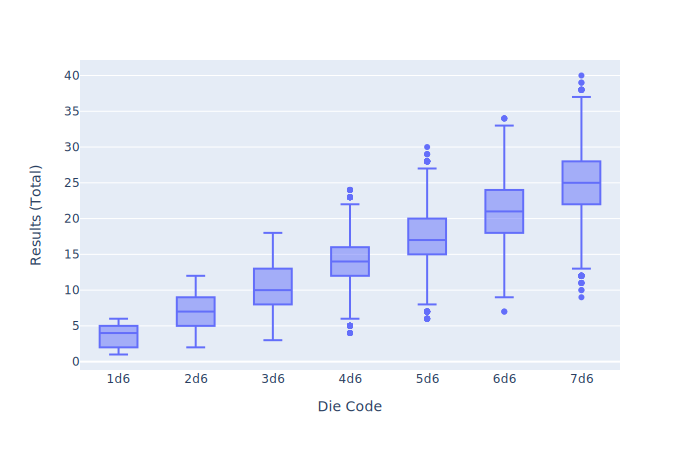

In [4]:
fig = px.box(df[df.pips == 0], x="code", y="value", labels={'code': 'Die Code', 'value': 'Results (Total)'})
fig.update_traces(quartilemethod="exclusive")
fig.update_yaxes(tick0=0, dtick=5)
fig.show("svg")

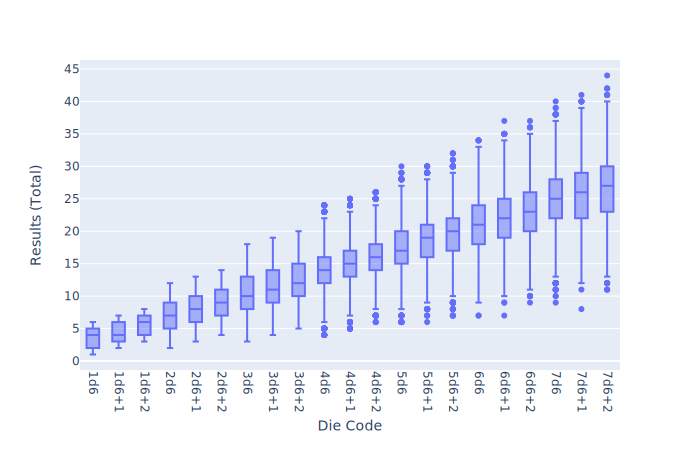

In [5]:
fig = px.box(df, x="code", y="value", labels={'code': 'Die Code', 'value': 'Results (Total)'})
fig.update_traces(quartilemethod="exclusive")
fig.update_xaxes(tickangle=90)
fig.update_yaxes(tick0=0, dtick=5)
fig.show("svg")

In [6]:
results = []
for i in range(1, 9):
    for k in range(10_000):
        results.append({
            'code': f'{i}d6',
            'dice': i,
            'value': roll_successes(i, target=4)
        })
df = pd.DataFrame(results).sort_values(by=['dice','value']).reset_index()
df

,index,code,dice,value
0,0,1d6,1,0
1,2,1d6,1,0
2,5,1d6,1,0
3,10,1d6,1,0
4,12,1d6,1,0
...,...,...,...,...
79995,78530,8d6,8,8
79996,78798,8d6,8,8
79997,78832,8d6,8,8
79998,79079,8d6,8,8


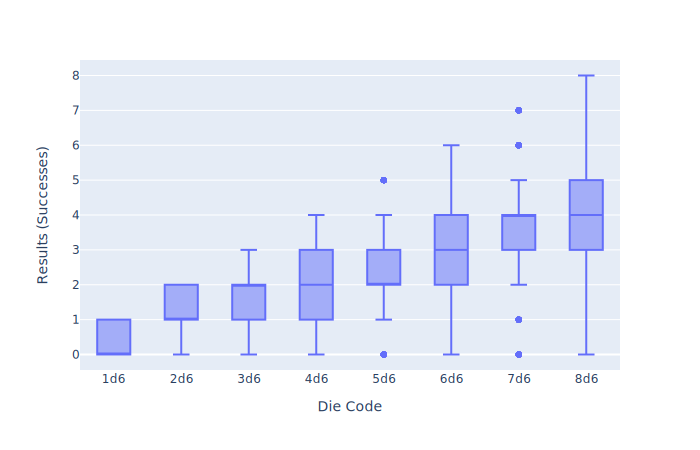

In [7]:
fig = px.box(df, x="code", y="value", labels={'code': 'Die Code', 'value': 'Results (Successes)'})
fig.update_traces(quartilemethod="exclusive")
fig.update_yaxes(tick0=0, dtick=1)
fig.show("svg")